## Model Evaluation Metrics
### Classification
#### Confusion Matrix (binary classification) - [TN, FP], [FN, TP] - X=Predicted Label; Y=True Label
- Accuracy - (# of correct predictions / total # of predictions) - model.score (TN + TP) / (TN + TP + FN + FP) - Percentage of total items classified correctly
- Precision - TP / (TP + FP) - Number of items correctly identified as positive out of total items identified as positive
- Recall / Sensativity / TP Rate - TP / (TP + FN) - Number of items correctly identified as positive out of total true positives
- Specificity / TN Rate - TN / (TN + FP) - Number of items correctly identified as negative out of total negatives
- FP Rate / Type 1 Error - FP / (FP + TN) - Number of items wrongly identified as positive out of total true negatives
- FN Rate / Type 2 Error - FN / (FN + TP) - Number of items wrongly identified as negative out of total true positives
- F1 Score - (2 * TP) / ((2 * TP) + FP + FN) - harmonic mean of precision and recall 
- ROC/AUC - X=FP-Rate FP / (FP+TN); Y=TP-Rate TP / (TP+FN) - if you randomly choose a positive case and a negative case, the probability that the positive case outranks the negative case according to the classifier is given by the AUC.  The value can range from 0 to 1. However auc score of a random classifier for balanced data is 0.5,
- Precision/Recall AUC - X=Recall; Y=Precision
- Matthews correlation coefficient - (TP*TN - FP*FN) / SQRT((TP+FP)(TP+FN)(TN+FP)(TN+FN))
- Log loss - Takes into account uncertainty of model predictions.  Larger penalty for confident false predictions.  Measurement of accuracy that incorporates the idea of probabilistic confidence
- Prefer F1 over ROC-AUC when you have a small positive class. This is the common problem in fraud detection where positive labels are few.

#### Confusion Matrix can be calculated for multi-class problems - X=Predicted Label; Y=True Label
- Most commonly used metrics for multi-classes are F1 score, Average Accuracy, Log-loss. There is yet no well-developed ROC-AUC score for multi-class.
- Precision, Recall, F1 score takes average parameter ("macro", "micro", "weighted")
-- micro: all samples equally contribute to the average.  preferable if there is a class imbalance problem
-- macro: all classes equally contribute to the average
-- weighted: each classes's contribution to the average is weighted by its size

#### GridSearchCV - scoring parameter can be set to optimize 'recall' for example

### Regression
- R^2 or R Coefficient of Determination (accuracy) - model.score (1=perfect fit; 0=DummyRegressor predicting average).  Explains how well your selected independent variable(s) explain the variability in your dependent variable(s).  MSE / variance of y.  Lower MSE = higher R^2 = better model
- Adjusted R^2 - R^2 adjusted for number of independent variables (penalizes more features).  It will increase if you add the useful terms and it will decrease if you add less useful predictors.
- MAE Mean Absolute Error - 0 to infinity (0 is best) - more robust to outliers because it averages to Median.
- MSE Mean Squared Error (metrics not in units of target value (squared)
- RMSE Root Mean Squared Error (corrects for MSE to get units of target value) - 0 to infinity (0 is best) - gives a relatively high weight to large errors and is differentiable
- RMSLE Root Mean Squared Logarithmic error - uses natural logarithm of (y+1) instead of y.  Shows relative error.  Penalizes under-predicted estimate more than over-predicted. i.e. 5 error on 50 is worse than 5 error on 50,000.

### Unsupervised
- Rand Index
- Mutual Information

### Others
- CV Error
- Heuristic Methods to find K
- BLEU score (NLP) - (Bilingual Evaluation Understudy)

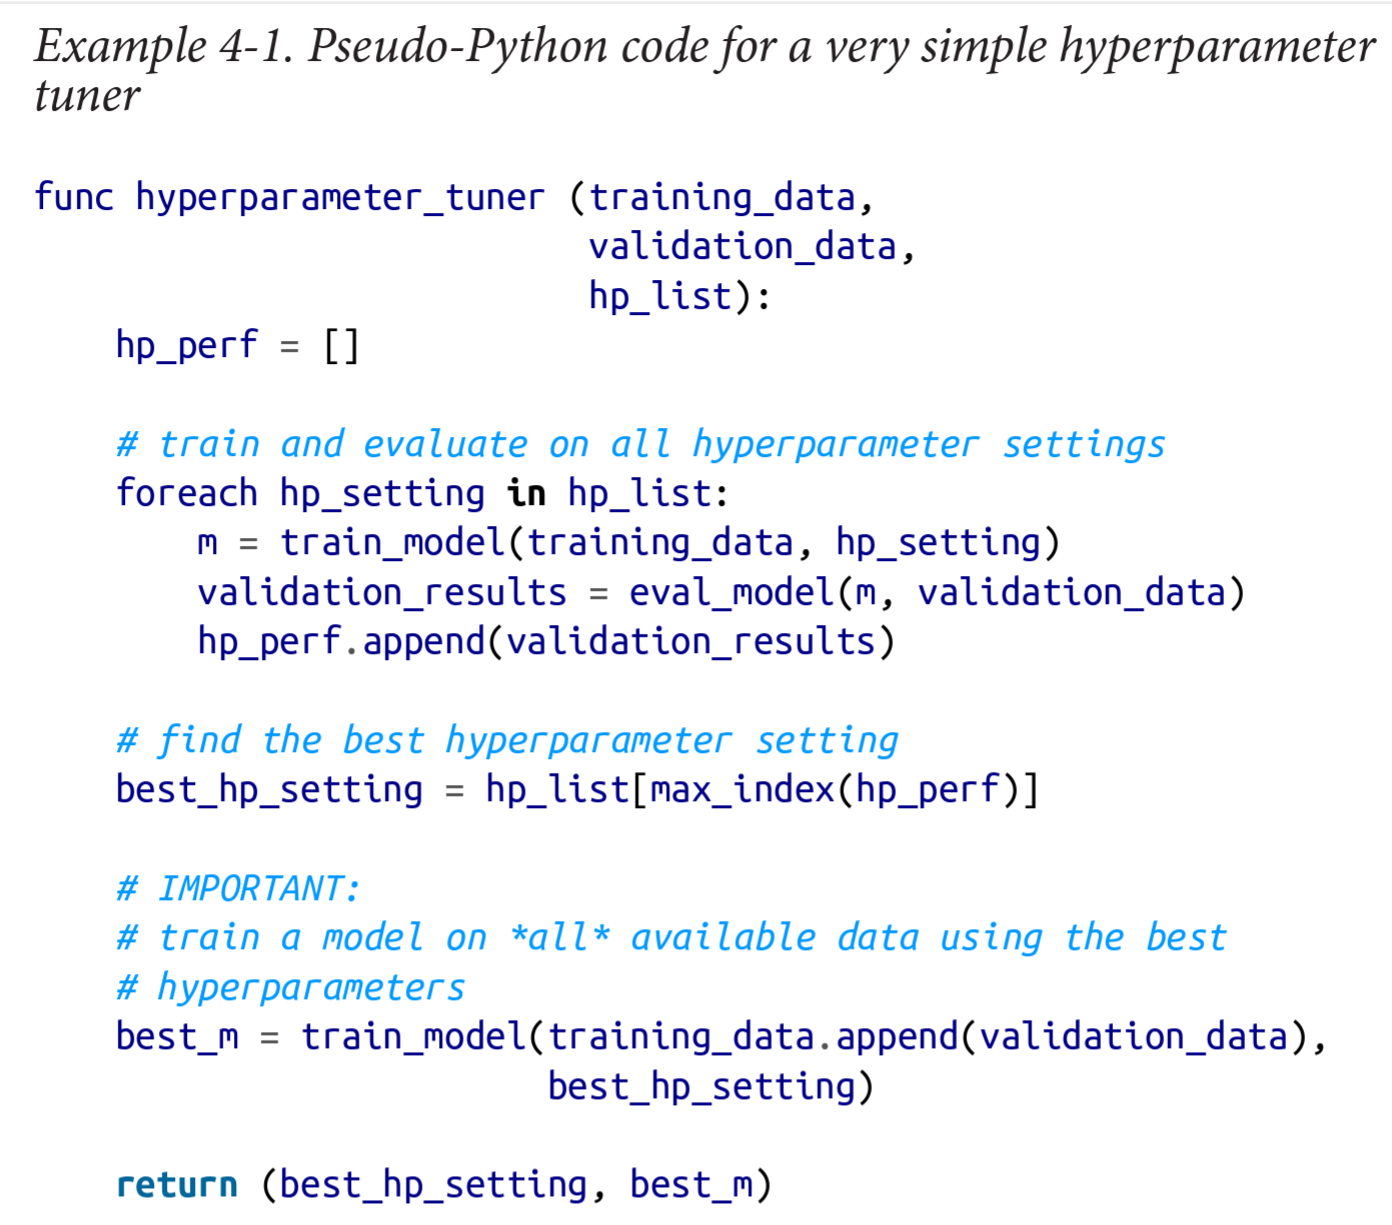

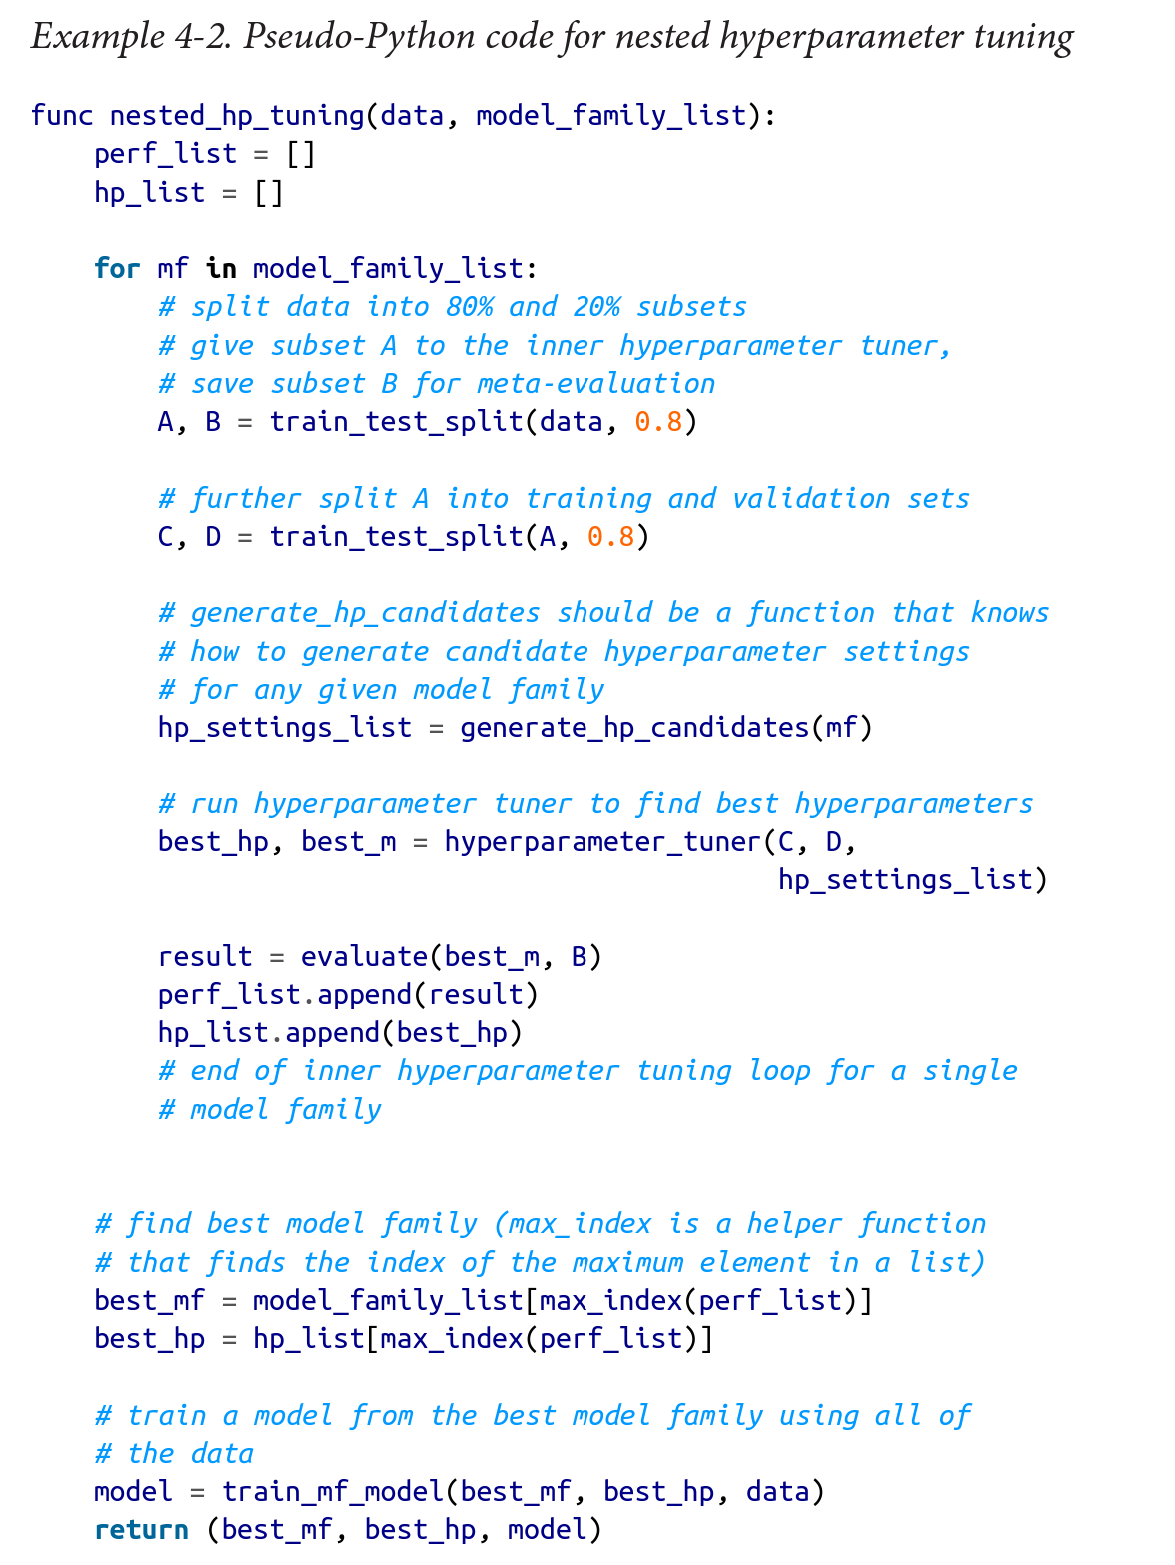

Scikit Learn supports a host of models for both supervised and unsupervised algorithms including:

- Regression: Fitting both linear and non-linear models
- Support Vector Machines (SVMs): Supervised method for classification
- Neural Networks: Supervised learning algorithm that learns a function by training a data set
- Decision Trees: Tree induction and pruning for classification and regression
- Clustering: Unsupervised classification
- Many others…

In addition, Scikit Learn offers some advanced functions not typically offered by other libraries:

- Outlier detection: Fits a regression model in the presence of corrupt data
- Ensemble methods: Bagging, Forests, Gradient Tree Boosting, and Model Voting
- Feature selection and analysis
- Model selection: Cross-validation, hyperparameter tuning, and metrics

# 1 Imports and File Locations<a id='1'></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree, metrics
from sklearn.linear_model import LinearRegression
from io import StringIO  
from IPython.display import Image  
import pydotplus

In [2]:
ext_data = '../data/external/'
raw_data = '../data/raw/'
interim_data = '../data/interim/'
report_figures = '../reports/figures/'

# 2 Read Train and Test data into dataframe<a id='2'></a>

In [3]:
X_train = pd.read_csv(interim_data + 'X_train.csv')
X_test = pd.read_csv(interim_data + 'X_test.csv')
y_train = pd.read_csv(interim_data + 'y_train.csv')
y_test = pd.read_csv(interim_data + 'y_test.csv')
X_train_scaled = pd.read_csv(interim_data + 'X_train_scaled.csv')
X_test_scaled = pd.read_csv(interim_data + 'X_test_scaled.csv')

In [11]:
X_train.head()

,tBEDS,tBATHS,tSTORIES,tUNITS,tBLDGS,JUST,HEAT_AR,ACREAGE,sales_date_epoch,improved,...,MKT_AREA_20,MKT_AREA_21,MKT_AREA_22,MKT_AREA_23,MKT_AREA_24,MKT_AREA_25,MKT_AREA_26,MKT_AREA_27,MKT_AREA_28,MKT_AREA_29
0,1.0,1.0,1.0,1.0,1.0,164119.0,677.0,0.393838,6605,True,...,1,0,0,0,0,0,0,0,0,0
1,4.0,3.0,1.0,1.0,1.0,398190.0,2789.0,0.196832,17295,True,...,0,0,0,0,0,1,0,0,0,0
2,2.0,2.0,1.0,1.0,1.0,275473.0,1459.0,0.548202,6543,True,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2.0,1.0,1.0,1.0,276698.0,1685.0,0.333429,12429,True,...,0,0,0,0,0,0,0,1,0,0
4,2.0,2.5,2.0,1.0,0.0,190025.0,1191.0,0.030083,12891,True,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_test.head()

,tBEDS,tBATHS,tSTORIES,tUNITS,tBLDGS,JUST,HEAT_AR,ACREAGE,sales_date_epoch,improved,...,MKT_AREA_20,MKT_AREA_21,MKT_AREA_22,MKT_AREA_23,MKT_AREA_24,MKT_AREA_25,MKT_AREA_26,MKT_AREA_27,MKT_AREA_28,MKT_AREA_29
0,2.0,2.5,2.0,1.0,0.0,139885.0,1159.0,0.045435,14768,True,...,0,0,0,1,0,0,0,0,0,0
1,5.0,3.5,2.0,1.0,1.0,493732.0,3170.0,0.137741,16576,True,...,0,0,0,0,0,0,0,0,0,0
2,4.0,2.0,1.0,1.0,1.0,141777.0,1296.0,0.122928,15345,True,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2.0,1.0,1.0,1.0,249353.0,1784.0,0.133084,12647,True,...,0,0,0,0,0,0,0,0,0,0
4,5.0,4.0,1.0,1.0,1.0,541942.0,3460.0,1.252010,7486,False,...,0,1,0,0,0,0,0,0,0,0


In [13]:
y_train.head()

,S_AMT
0,16850.0
1,384700.0
2,43000.0
3,145800.0
4,170600.0


In [14]:
y_test.head()

,S_AMT
0,72000.0
1,434700.0
2,35000.0
3,148000.0
4,77500.0


# 3 Evaluate Models<a id='3'></a>

### Decision Tree - Entropy - Max Depth=5

In [6]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
# TODO: Use DecisionTreeRegressor
entr_model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)

# Call fit() on entr_model
entr_model.fit(X_train, y_train) 

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test) 

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
pd.Series(y_pred) 

# Check out entr_model
entr_model

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [19]:
entr_model.classes_.size

10376

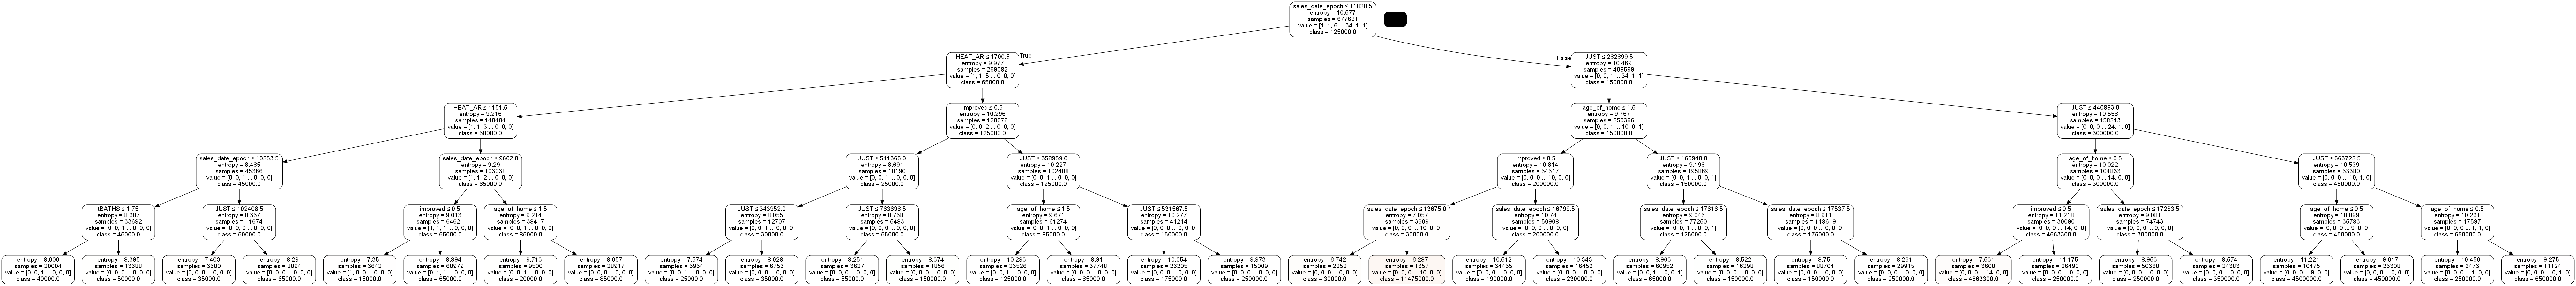

In [22]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns, class_names=entr_model.classes_.astype(str))  

# Alternatively for class_names use entr_model.classes_  (class_names=["NO", "YES"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [29]:
# Run this block for model evaluation 
# TODO: Use root mean squared error
print("Model Entropy model max depth 5")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, average = 'weighted'))
print('Recall score' , metrics.recall_score(y_test,y_pred, average = 'weighted'))

Model Entropy model max depth 5
Accuracy: 0.015564776503503108
Balanced accuracy: 0.000914120390087659
Precision score 0.0015328962151191048
Recall score 0.015564776503503108


C:\Users\mkars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Linear Regression Model

In [31]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [33]:
# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
# TODO: Use root mean squared error
r_sq = lm.score(X_train, y_train)
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', lm.intercept_)

# Print the Slope:
print('slope:', lm.coef_) 

# Predict a Response and print it:
y_pred = lm.predict(X_test)
print('Predicted response:', y_pred, sep='\n')

coefficient of determination: 0.14695712100914193
intercept: [466.04765974]
slope: [[-3.21582187e+03  2.37175021e+03 -1.71970774e+04 -9.60574173e+04
   8.32853419e+04  3.58252015e-01  4.42626798e+01 -1.36840315e+04
   1.74195808e+01 -1.18321238e+05 -5.13081820e+02  4.21066471e+04
   9.62377938e+03 -9.57700956e+04  6.27615228e+04 -4.59023492e+04
  -5.54469148e+04  8.26274103e+04  5.88435414e+03  1.70130725e+04
   3.90271295e+04 -2.29530454e+04 -5.14704192e+03 -1.48164059e+04
  -1.93697152e+04 -1.50186462e+04  1.76624824e+04  1.48004876e+04
   1.31570658e+04  6.61174928e+02  6.88171566e+03 -1.34896633e+04
  -1.16939254e+04  2.66271042e+04 -6.89160342e+03 -2.41655902e+04
  -4.01121715e+04 -1.10407648e+04 -3.13744481e+04 -2.88817181e+04
  -1.19395245e+04 -1.15624875e+04 -1.59494888e+04 -1.85954036e+03
   1.41171088e+05  3.86294174e+03 -4.82836360e+02]]
Predicted response:
[[173767.03662217]
 [393471.46054654]
 [132991.39998463]
 ...
 [-28242.07672924]
 [151884.98412531]
 [ 35434.29841599]]

In [1]:
# TODO: Add RandomForest and KNN